In [26]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from sklearn.metrics import r2_score
import csv
from io import StringIO
#import missingno as msno
import io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('PDF')
#from StringIO import StringIO
from sklearn import linear_model, metrics, pipeline, preprocessing
from sklearn.preprocessing import FunctionTransformer
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler  
import calendar

In [27]:
%run Cycle_Car_preprocess.ipynb

155
Rows in car data  101669
carpercentmissing 0
carpercentmissing 0.0
Rows in cycle data  868084
504602
4340420
cyclepercentmissing 0.11625649130729285
Rows in the met data  8784
Sensor id  10000010 [] Rows  9506
Sensor id  10000210 [] Rows  26283
Sensor id  10000480 [] Rows  26283
Sensor id  10000790 [] Rows  26283
cyclepercentmissing 0.11625649130729285
   SENSOR_ID                TIME  LANE  SUM        DTC
0   10000010 2015-02-01 00:00:00  99.0  5.0  43.631375
1   10000010 2015-02-01 01:00:00  99.0  2.0  43.631375
2   10000010 2015-02-01 02:00:00  99.0  6.0  43.631375
3   10000010 2015-02-01 03:00:00  99.0  5.0  43.631375
4   10000010 2015-02-01 04:00:00  99.0  4.0  43.631375
Rows in cycling data combined with met  88345
Rows in car data combined with met  101661
Station id  300016
Station id  300099
Station id  300233
Station id  302257
Station id  300083
Rows in cycling data combined with met  78840 101661 0 101661
(101661, 13)
(78840, 13)


In [28]:
del cycle_met_clean_data['WEEKDAY']
del cycle_met_clean_data['MONTH']
cycle_met_clean_data['WEEKDAY'] = cycle_met_clean_data['TIME'].dt.weekday #weekday_name#Insert a column with weekday name
cycle_met_clean_data['MONTH'] = cycle_met_clean_data['TIME'].dt.month
cycle_met_clean_data.head()


/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SENSOR_ID,TIME,LANE,SUM,DTC,STATION_ID,WIND_MAG,TEMP,PPT,RH,HOUR,WEEKDAY,MONTH
1,10000210,2015-02-01 01:00:00,0.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
2,10000210,2015-02-01 01:00:00,1.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
3,10000210,2015-02-01 01:00:00,2.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
4,10000480,2015-02-01 01:00:00,0.0,1.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2
5,10000480,2015-02-01 01:00:00,1.0,0.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2


In [29]:
car_met_clean_sensor_location['WEEKDAY'] = car_met_clean_sensor_location['TIME'].dt.weekday #weekday_name#Insert a column with weekday name
car_met_clean_sensor_location['MONTH'] = car_met_clean_sensor_location['TIME'].dt.month
car_met_clean_sensor_location.head()

,SENSOR_ID,DIRECTION,SUM,TIME,STATION_ID,WIND_MAG,TEMP,PPT,RH,WEEKDAY,MONTH,HOUR,DTC
0,300016,1,284,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
1,300016,2,317,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,6,2,1,333.665928
2,300016,1,165,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
3,300016,2,216,2015-02-01 02:00:00,18700,6.2,-1.3,0.0,77,6,2,2,333.665928
4,300016,1,98,2015-02-01 03:00:00,18700,6.5,-1.5,0.1,79,6,2,3,333.665928


In [30]:
#Visualizing and Manipulating/Creating columns of dataframe
#S300099['temp_F']=S300099.TempC*1.8+32  ###Adds a column by using another column
#S300099.rename(columns={'SUM':'total'},inplace=1) ##Renames
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
#S300099['temp_cut']=pd.cut(S300099.TempC,[-15,0,15,30])  
#plt.rcParams['figure.figsize']=(14,12)
#plt.rcParams['font.size']=14
#sns.set_style("whitegrid")
#g=sns.swarmplot(x='HOUR',y='SUM',hue='temp_cut',data=S300099)
#g.set(xlabel="Hour within a Day", ylabel="Number of Cars on Road")
#del S300099['temp_cut']

#Data viewing
#S300099.head()
#S300099.tail(3)
#S300099.describe()
#S300099.index
#S300099.columns

#Data sorting by index and by label
#S300099.sort_index(axis=1, ascending=False)
#S300099.sort_values(by='STARTHOUR')
#S300099.T

#Dataframe copying
#df=S300099.copy()

#df[['B', 'A']] = df[['A', 'B']] # cOLUMN NAME IS SAME BUT COLUMN VALUES INTERCHANGED
#dfa['A'] = list(range(len(dfa.index)))   #Create A
#dfa.A = list(range(len(dfa.index)))   #If A already exists

#Slicing - Selecting by label and Selecting by location
#df.iloc[:, 1:3]
#df[:3]
#df.where(df < 0, -df)

#Missing data
#df1.dropna(how='any')
#df1.fillna(value=5)

#Functions
#df.apply(np.mean, axis=1)
#df.apply(lambda x: x.max() - x.min())
#df.apply(np.exp)
#df.apply(np.cumsum)




**INFORMATION ABOUT DATA**
Assessing column - Generally, you can access a column of the DataFrame through indexing using the [] operator (e.g. df['col']), or through attribute (e.g. df.col). Attribute accessing makes the code a bit more concise when the target column name is known beforehand, but has several caveats -- for example, it does not work when the column name is not a valid Python identifier (e.g. df.123), or clashes with the built-in DataFrame attribute (e.g. df.index). On the other hand, the [] notation should always work.

**OUTLIER DETECTION**


In [31]:
cycle_met_clean_data.dtypes

cycle_met_clean_data.shape

#column_list = car_met_clean_sensor_location.columns.values.tolist()
#for column_name in column_list:
#    print (car_met_clean_sensor_location[column_name].unique())
    
    
#msno.matrix(S300099,figsize=(12,5))
#corr = S300099.corr()
#sns.heatmap(corr, 
 #           xticklabels=corr.columns.values,
#          yticklabels=corr.columns.values)
#plt.figure()
#plt.ylabel('SUM')
#S300099.groupby('TIME').size().plot(x='TIME',y='SUM',kind = 'bar',figsize = (14,4))


cycle_met_clean_dataNOOUTLIERS=cycle_met_clean_data[np.abs(cycle_met_clean_data["SUM"]-cycle_met_clean_data["SUM"].mean())<=(3*cycle_met_clean_data["SUM"].std())] 
print ("Shape before Outlier removal: ",cycle_met_clean_data.shape)
print ("Shape  After Outlier removal: ",cycle_met_clean_dataNOOUTLIERS.shape)

Shape before Outlier removal:  (78840, 13)
Shape  After Outlier removal:  (77075, 13)


Feature Selection methods if required
http://scikit-learn.org/stable/modules/feature_selection.html

In [32]:
S300099=cycle_met_clean_dataNOOUTLIERS.copy()
S300099.head()

,SENSOR_ID,TIME,LANE,SUM,DTC,STATION_ID,WIND_MAG,TEMP,PPT,RH,HOUR,WEEKDAY,MONTH
1,10000210,2015-02-01 01:00:00,0.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
2,10000210,2015-02-01 01:00:00,1.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
3,10000210,2015-02-01 01:00:00,2.0,0.0,46.336212,18700,5.8,-1.0,0.0,75,1,6,2
4,10000480,2015-02-01 01:00:00,0.0,1.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2
5,10000480,2015-02-01 01:00:00,1.0,0.0,41.585130,18700,5.8,-1.0,0.0,75,1,6,2


## Feature Engineering or preprocessing## 
Continuouse variables are quantitative values. Computer can understand numbers.

Category variables are qualitative. They are distinctly sub-divided into categories . (Nominal - no order and no comparison. Ordinal - Ranked and comparison is possible . Dichotomous (or Binary) with Yes and No). Category variables need to be converted using encoding. There are numerous ways of encoding as mentioned in  https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 , some popular ones are using one hot encoding (for nominal variables) or label encoding (for ordinal variables).  https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/ 

Cyclic variables (hour of day 23 and 0, weekday - sunday to monday) and Non-Cyclic variables. See how to treat them :  http://blog.davidkaleko.com/feature-engineering-cyclical-features.html, and https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning.


In [33]:
X2 = S300099.ix[:,S300099.columns != 'SUM']
y2 = S300099.ix[:,S300099.columns == 'SUM']
## convert to matrices 
X2 = np.matrix(X2.values)
y2 = np.array(y2.values)
print(S300099.shape)

#S300099=S300099.ix[:,S300099.columns != 'AVGSPEED']

print(S300099.head())
print('before', S300099.shape)
S300099['xHOUR']= np.sin(2*np.pi*S300099['HOUR']/24)
S300099['yHOUR']= np.cos(2*np.pi*S300099['HOUR']/24)
S300099=S300099.rename(index=str, columns={"TEMP": "TempC", "PPT": "Pptmm","RH": "Humidpercen","WIND_MAG": "WINDSPEED"})
print(S300099.head())
#hour remove from above
#', 'DirectionDeg',



#Data Classification

#binary_data_columns = ['holiday', 'workingday']
#binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

#categorical_data_columns = ['season', 'weather', 'month'] 
#categorical_data_columns = ['WEEKDAY'] 

S3000991=S300099.copy()
S300099.drop(['SENSOR_ID','SUM','TIME','STATION_ID','HOUR','LANE'],inplace=True,axis = 1)

categorical_data_columns = ['MONTH','WEEKDAY'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in S300099.columns], dtype = bool)
#S300099.drop(categorical_data_columns,inplace=True, axis = 1)
print('categoricaldata',categorical_data_indices)

numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR']
print('after', S300099.shape)

#numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in S300099.columns], dtype = bool)
print('numericdata',numeric_data_indices)
#['xHOUR','yHOUR','xdirection','ydirection','TempC','Pptmm','Humidpercen','AVGSPEED']

transformer_list = [        
            #binary
            #('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
          ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                     ])),
        ]



/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/mandart/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user

(77075, 13)
   SENSOR_ID                TIME  LANE  SUM        DTC  STATION_ID  WIND_MAG  \
1   10000210 2015-02-01 01:00:00   0.0  0.0  46.336212       18700       5.8   
2   10000210 2015-02-01 01:00:00   1.0  0.0  46.336212       18700       5.8   
3   10000210 2015-02-01 01:00:00   2.0  0.0  46.336212       18700       5.8   
4   10000480 2015-02-01 01:00:00   0.0  1.0  41.585130       18700       5.8   
5   10000480 2015-02-01 01:00:00   1.0  0.0  41.585130       18700       5.8   

   TEMP  PPT  RH  HOUR  WEEKDAY  MONTH  
1  -1.0  0.0  75     1        6      2  
2  -1.0  0.0  75     1        6      2  
3  -1.0  0.0  75     1        6      2  
4  -1.0  0.0  75     1        6      2  
5  -1.0  0.0  75     1        6      2  
before (77075, 13)
   SENSOR_ID                TIME  LANE  SUM        DTC  STATION_ID  WINDSPEED  \
1   10000210 2015-02-01 01:00:00   0.0  0.0  46.336212       18700        5.8   
2   10000210 2015-02-01 01:00:00   1.0  0.0  46.336212       18700        5.8   

count=0
for var in categorical_data_indices:
    if var==True:
        S300099[count] = S300099[count].astype("category")
        count0count+1
    
dataTypeDf = pd.DataFrame(S300099.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")    

## Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

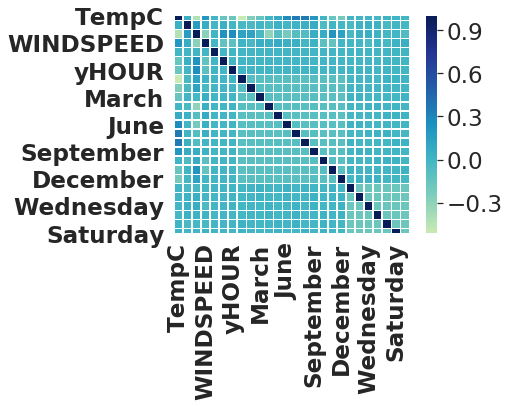

In [34]:
#print(S300099['WEEKDAY'].unique())
#print(S300099['MONTH'].unique())
df_dummies1 = pd.get_dummies(S300099[categorical_data_columns[0]])
df_dummies1.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_dummies2 = pd.get_dummies(S300099[categorical_data_columns[1]])
df_dummies2.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#print(S300099[categorical_data_columns])
#print(S300099.head())
#print(S300099[numeric_data_columns])

#del df_dummies[df_dummies.columns[-1]]
#print('Dummies',df_dummies.head())
df_new = pd.concat([S300099[numeric_data_columns], df_dummies1, df_dummies2 ], axis=1)
#print('New',df_new)
#del df_new[categorical_data_columns]
corrMatt = df_new.corr()
#mask = np.array(corrMatt)
#mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
#fig.set_size_inches(20,10)
sns.set(font_scale=2.1)
ax=sns.heatmap(corrMatt, vmax=1, square=True,center=0,linewidths=.5,cmap="YlGnBu")
for label in ax.get_yticklabels():
        label.set_weight("bold")
for label in ax.get_xticklabels():
        label.set_weight("bold")
        
fig.savefig('cycleCorrelations.pdf',bbox_inches='tight')

## Visualizing Distribution Of Data
As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

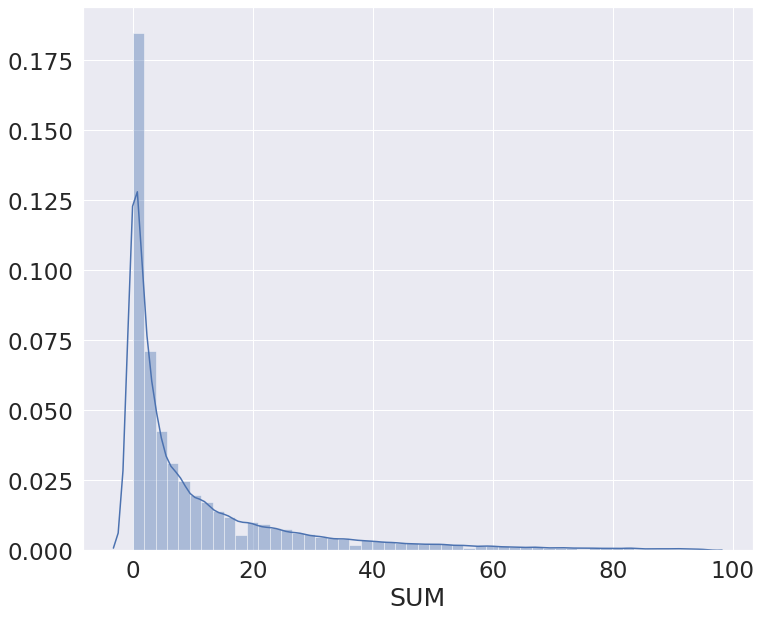

In [35]:
fig,axes = plt.subplots(ncols=1,nrows=1)
fig.set_size_inches(12, 10)
sns.distplot(S3000991["SUM"])#ax=axes[0]
fig.savefig('Distribution.pdf',bbox_inches='tight')
#stats.probplot(S300099["SUM"], dist='norm', fit=True, plot=axes[0][1])
#sns.distplot(np.log(S300099["SUM"]),ax=axes[1])
#stats.probplot(np.log1p(S300099["SUM"]), dist='norm', fit=True, plot=axes[1][1])

# Visualizing Count Vs Independent variables

In [36]:
def violinplot(data_in,key,target,xlabel,ylabel,title,out_file):
    col_order = np.sort(data_in[key].unique()).tolist()
    plt.figure(figsize=(16,6))
    sns.violinplot(x=key, y=target, data=data_in, order=col_order)
    #plt.ylim([-100,1000])
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.title(title, fontsize=25)
    #plt.show()
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()

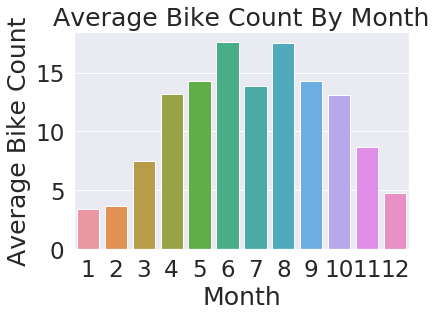

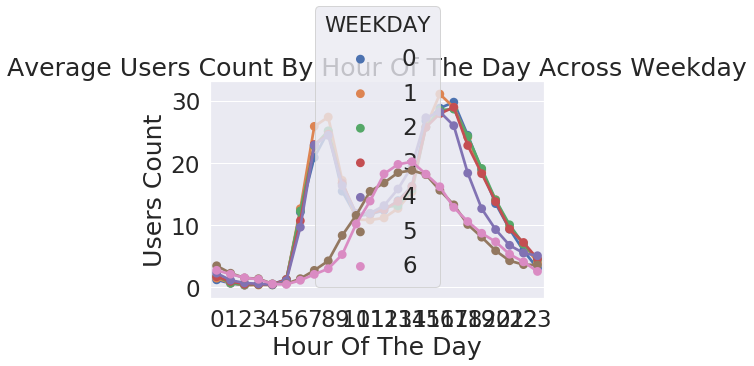

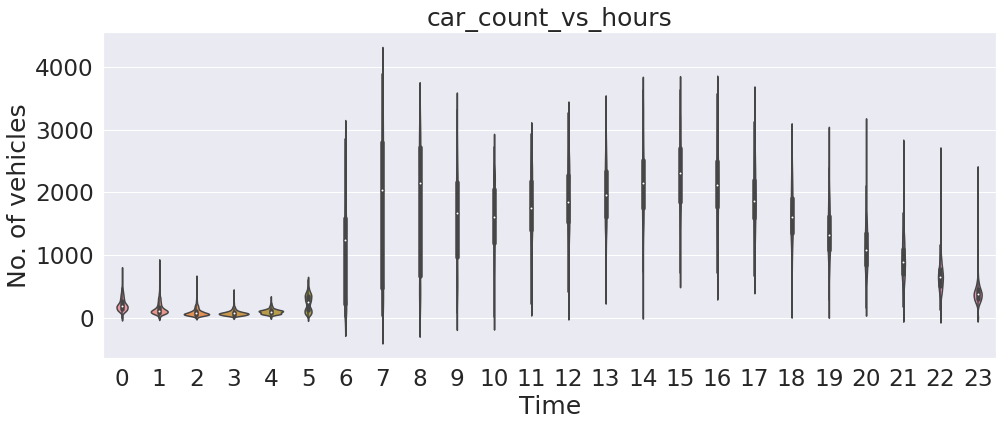

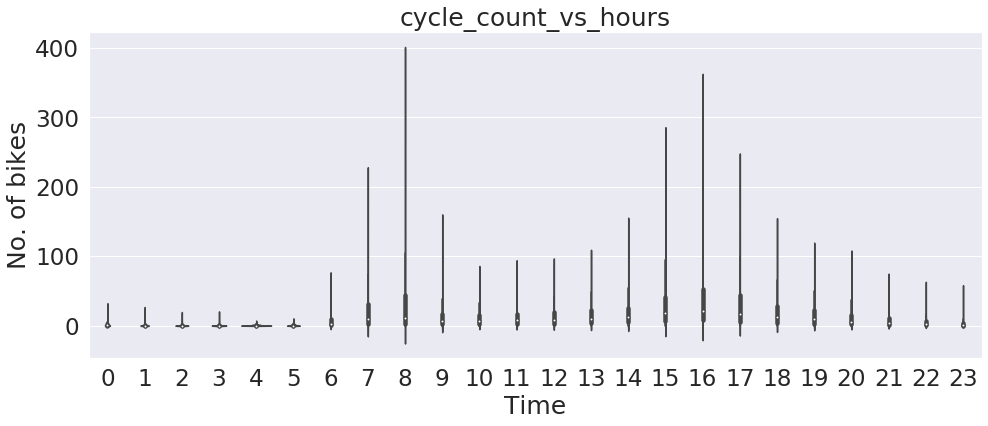

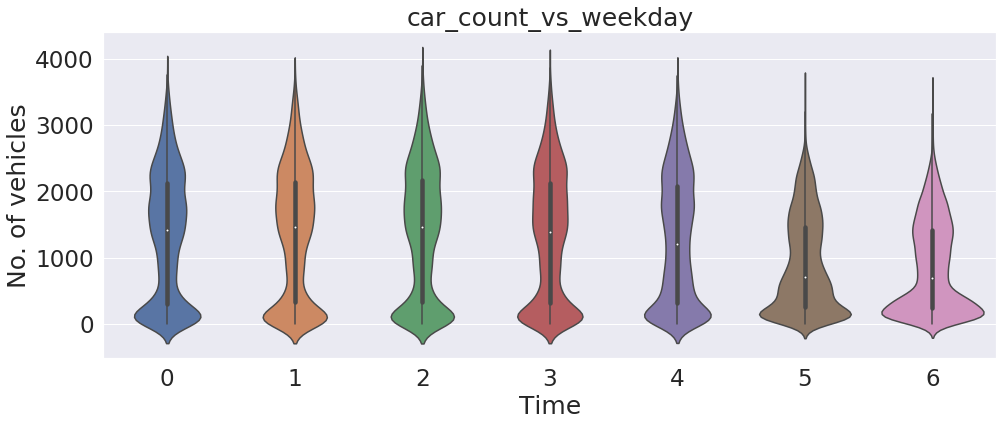

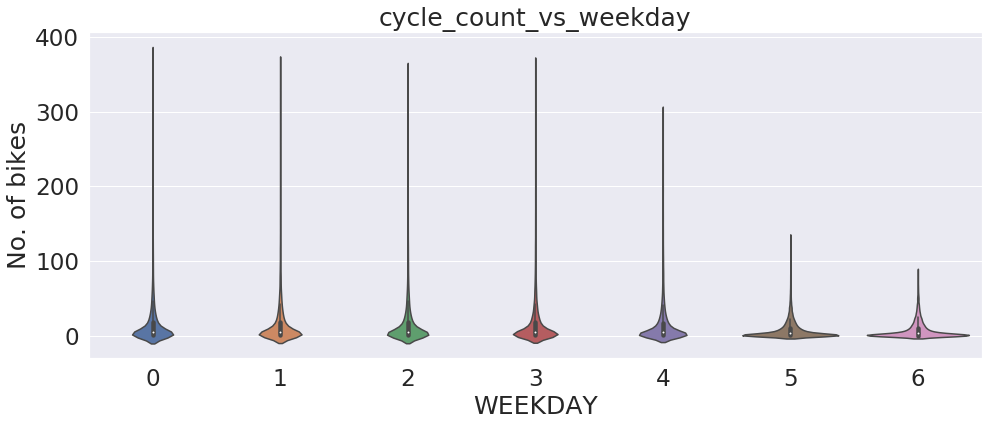

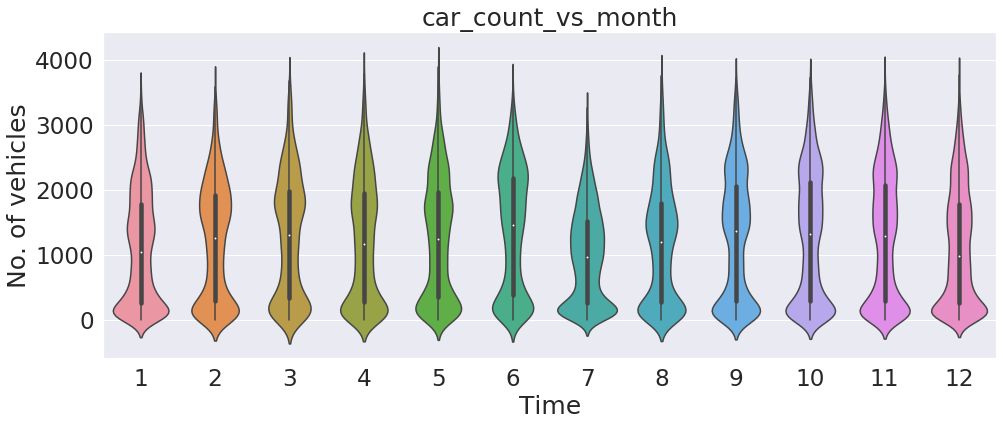

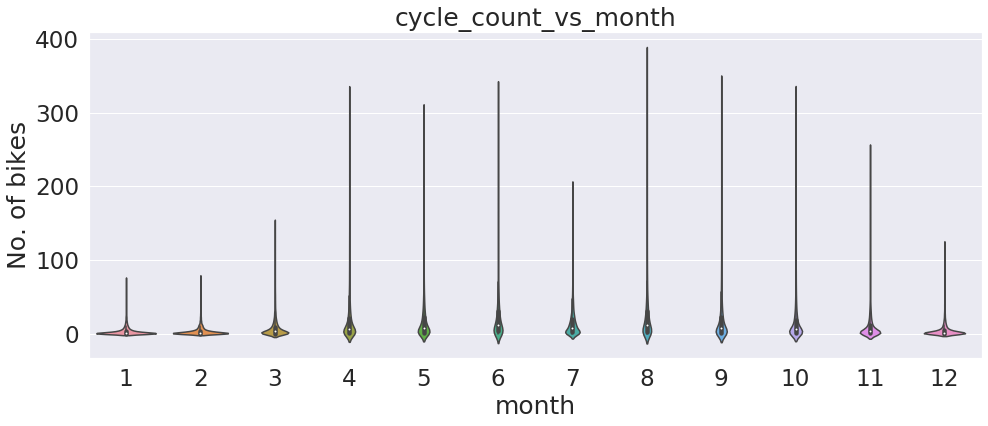

In [37]:
plt.figure(1)
#(ax1,ax2)= plt.subplots(nrows=2), plt.figure(figsize=(16,6))
#fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(S3000991.groupby("MONTH")["SUM"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="SUM",ascending=False)
ax1=sns.barplot(data=monthSorted,x="MONTH",y="SUM")#,order=sortOrder
ax1.set(xlabel='Month', ylabel='Average Bike Count',title="Average Bike Count By Month")
fig = ax1.get_figure()
fig.savefig('MonthSumoriginal.pdf',bbox_inches='tight')
#plt.show()

plt.figure(2)
hourAggregated = pd.DataFrame(S3000991.groupby(["HOUR","WEEKDAY"],sort=True)["SUM"].mean()).reset_index()
ax2=sns.pointplot(x=hourAggregated["HOUR"],y=hourAggregated["SUM"],hue=hourAggregated["WEEKDAY"], data=hourAggregated)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekday",label='big')
#mylabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#ax2.legend(labels=mylabels)
#plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#for t, l in zip(ax2.legend.get_texts(), new_labels): t.set_text(l)
fig = ax2.get_figure()
fig.savefig('Weekhourcount.pdf',bbox_inches='tight')
#plt.show()

violinplot(car_met_clean_sensor_location,'HOUR','SUM','Time','No. of vehicles','car_count_vs_hours','car_count_vs_hours.pdf')
violinplot(cycle_met_clean_data,'HOUR','SUM','Time','No. of bikes','cycle_count_vs_hours','car_count_vs_hours.pdf')


violinplot(car_met_clean_sensor_location,'WEEKDAY','SUM','Time','No. of vehicles','car_count_vs_weekday','car_count_vs_weekday.pdf')
violinplot(cycle_met_clean_data,'WEEKDAY','SUM','WEEKDAY','No. of bikes','cycle_count_vs_weekday','cycle_count_vs_weekday.pdf')

violinplot(car_met_clean_sensor_location,'MONTH','SUM','Time','No. of vehicles','car_count_vs_month','car_count_vs_month.pdf')
violinplot(cycle_met_clean_data,'MONTH','SUM','month','No. of bikes','cycle_count_vs_month','cycle_count_vs_month.pdf')



In [38]:
#S300099.drop(['SENSOR_ID','DIRECTION','SUM','TIME','STATION_ID','HOUR','DIRECTION'],inplace=True,axis = 1)
#numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR','xdirection','ydirection']
#print(S300099.head())

**SPLIT TRAINING AND TEST DATA NEXT**

In [39]:
#S300099.reindex(np.random.permutation(S300099.index))
#S300099['HOUR']=S3000991['HOUR']

X_train, X_test, y_train, y_test = train_test_split(S300099,y2,test_size=0.2,shuffle=False)

#def non_shuffling_train_test_split(X, y, test_size=0.2):
#    i = int((1 - test_size) * X.shape[0]) + 1
#    X_train, X_test = np.split(X, [i])
#    y_train, y_test = np.split(y, [i])
#    return X_train, X_test, y_train, y_test


#X_train=X_train.head(100)
#X_test=X_test.head(100)
#y_train=y_train[:100]
#y_test=y_test[:100]

#print(S300099.head())
#print(X_train.head())
#print(numeric_data_indices)
#print(categorical_data_indices)

In [40]:
print(transformer_list)

[('numeric_variables_processing', Pipeline(memory=None,
         steps=[('selecting',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function <lambda> at 0x7f079c922440>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('scaling',
                 StandardScaler(copy=True, with_mean=0, with_std=True))],
         verbose=False)), ('categorical_variables_processing', Pipeline(memory=None,
         steps=[('selecting',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function <lambda> at 0x7f079c922320>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('hot_encoding',
                 OneHotEncoder(categories='auto', drop=None,

In [41]:
#plt.matshow(S300099.corr())


In [42]:
#S300099.plot(kind='scatter', x='Speedmps', y='SUM', figsize=(12,8))

FEATURE SCALING NEXT TO IMPROVE CONVERGENCE OF OPTIMIZER
http://scikit-learn.org/stable/modules/preprocessing.html
(Rescale data. Standardize data. Normalize data. Binarize data.)
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
Categorial : https://stackoverflow.com/questions/33976845/using-categorical-data-as-features-in-sklean-logisticregression

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(X2norm,y2, test_size=0.2, random_state = 2)

In [19]:
def scoring(clf):
    scores = cross_val_score(clf, X_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores)*-1)

In [20]:
def hypertune(estimator,tuned_parameters,cv1,X_train,y_train):
    #print (estimator,tuned_parameters,cv1)
    print('estimator',estimator)
    print('tunedparameters',tuned_parameters)
    print('cv',cv1)
    clf = GridSearchCV(estimator,tuned_parameters,cv=cv1)
#,scoring    
    print(X_train.shape,y_train.shape)
    clf.fit(X_train,y_train)
    print("Coefficients based on fit:")
    print()
    #print("Coefficient: ", clf.best_estimator_.steps[-1][1].coef_)   
    print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The R2 scores are computed on the full evaluation set, and is.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(r2_score(y_true, y_pred))
    print()
    return clf

In [21]:
def plot_learning_curve(estimator,outfile,title, X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(outfile,bbox_inches='tight')
    return (plt,train_sizes, train_scores, test_scores)

In [ ]:
def plot_measured_prediction(title,y_test,predicted,out_file):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()
    return plt

**LINEAR REGRESSION**

In [ ]:
from sklearn import linear_model
degrees = [1,2]
for i in range(len(degrees)):
    print ("Evaluating degree",degrees[i])
    #ax = plt.subplot(1, len(degrees), i + 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = linear_model.LinearRegression()
    estimpipeline = Pipeline([('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
                              ('make_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),  
                              ("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    param_grid = {
    #'model_fitting__alpha' : [5,1,0.5,100,200]
     #   'model_fitting__alpha' : [5]
                }
    y_t=y_train.ravel()

    clf=hypertune(estimpipeline,param_grid,3,X_train,y_t)
    # Evaluate the models using crossvalidation
    #scores = cross_validation.cross_val_score(pipeline,
     #   X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    predictedlr = clf.best_estimator_.predict(X_test)
    #plt.plot(X_test,clf.predict(X_test,label="Model"))
    
    title1 = ("Learning Curve for Linear degree",degrees[i])
    out_file1=('LinearFitLC.pdf')
    
    plot_learning_curve(clf.best_estimator_,out_file1,title1,X_train,y_t, ylim=None,cv=3,n_jobs=1)
    
    
    title = ("Linear fit for degree %i - measured Vs predicted",degrees[i])
    out_file=('LinearFitPrediction.pdf')
    plot_measured_prediction(title,y_test,predictedlr,out_file)
    
    print ("LR Daily error of trip count:", median_absolute_error(y_test,predictedlr)) 
    #plt.scatter(X, y, label="Samples")
    #plt.xlabel("x")
    #plt.ylabel("y")
    #plt.xlim((0, 1))
    #plt.ylim((-2, 2))
    #plt.legend(loc="best")
    #plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    #    degrees[i], -scores.mean(), scores.std()))

    
#plt.show()

#.....................................

#lr = linear_model.LinearRegression()
             
#estimator = pipeline.Pipeline(steps = [       
#   ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
#    ('model_fitting', lr)
#    ]
                              
#param_grid = {
    #'model_fitting__alpha' : [5,1,0.5,100,200]
#                }
                              
#clf=hypertune(estimpipeline,param_grid,3,X_train,y_train)                              

#print (clf.best_estimator_)
#y_predicted=clf.predict(X_test)

#lr.fit(X_train,y_train)
#print("Theta or weight coefficients calculated by SK-learn regression ",lr.coef_)
#print("Bias or intercept calculated by SK-learn regression ",lr.intercept_)
#lr_preds=lr.predict(X_test)  
#..............................................

#http://scikit-learn.org/0.17/auto_examples/model_selection/plot_underfitting_overfitting.html

#poly = PolynomialFeatures(degree=2)
#X_ = poly.fit_transform(X)
#predict_ = poly.fit_transform(predict)

#clf = linear_model.LinearRegression()
#clf.fit(X_, vector)
#print clf.predict(predict_)
#print ("LR Daily error of trip count:", median_absolute_error(y_test, lr_preds))

**PENALTY BASED REGRESSION - LASSO REGRESSION**

In [ ]:
regressor = linear_model.Lasso(max_iter = 10000)

estimator = pipeline.Pipeline([  
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', regressor)
    ])
#estimator = pipeline.Pipeline(steps = [       
 #   ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
#  ('model_fitting', regressor)
   # ])
                             
param_grid = {
 'model_fitting__alpha' : [0.5,10,200]
}
#Param grid can be left blank

#rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
#grid_cv = GridSearchCV(estimator, parameters_grid,cv =3)
#grid_cv.fit(X_train,y_train)
#predicted = grid_cv.best_estimator_.predict(X_test)
#print("RMSLE: ", r2_score(y_test, predicted))
#print("MAE: ",  metrics.mean_absolute_error(y_test, predicted))

grid_cv=hypertune(estimator,param_grid,3,X_train,y_train)
#print (grid_cv.best_estimator_)

predicted = grid_cv.best_estimator_.predict(X_test)

title1 = ("Learning Curve - Lasso")
out_file1=('LassoFitLC.pdf')
plot_learning_curve(grid_cv.best_estimator_,out_file1,title1,X_train,y_train, ylim=None,cv=3,n_jobs=1)
    
    
title = ("Lasso Fit - measured Vs predicted")
out_file=('LassoFitPrediction.pdf')
plot_measured_prediction(title,y_test,predictedlr,out_file)

print ("Lasso Daily error of trip count:", median_absolute_error(y_test,predicted))


#print("Best params: ", grid_cv.best_params_)
print("Coefficient: ", grid_cv.best_estimator_.steps[-1][1].coef_)
final_pipeline_ingridCV = grid_cv.best_estimator_
final_classifier = final_pipeline_ingridCV.named_steps['model_fitting']
print('final classifer',final_classifier)
#print("fit",grid_cv.fit)


**TREE BASED REGRESSION - RANDOM FOREST, GRADIENT BOOST**

In [ ]:
rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 2)
#scoring(rfr)    

gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
#scoring(gbr)

dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)
y_t=y_train.ravel()

estimatorrfr = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', rfr)
    ])
param_grid = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#'n_estimators': [50,100,10]
}

grid_cv=hypertune(estimatorrfr,param_grid,3,X_train,y_t)
#print (grid_cv.best_estimator_)


estimator2 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('make_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),  
    ('model_fitting', gbr)
    ] )

#estimator2 = make_pipeline (pipeline.FeatureUnion(transformer_list=transformer_list),
#                           FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
#                           ('model_fitting', gbr))

param_grid2 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'n_estimators': [50,100,10]
}

grid_cv2=hypertune(estimator2,param_grid2,3,X_train,y_t)

predicted = grid_cv.best_estimator_.predict(X_test)
predicted2 = grid_cv2.best_estimator_.predict(X_test)

estimator3 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', dtr)
    ] )
param_grid3 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'max_depth': [6,7,8]
}

grid_cv3=hypertune(estimator3,param_grid3,3,X_train,y_t)

predicted = grid_cv.best_estimator_.predict(X_test)
predicted2 = grid_cv2.best_estimator_.predict(X_test)
predicted3 = grid_cv3.best_estimator_.predict(X_test)
finalpredicted = 0.33*predicted + 0.33*predicted2 + 0.33*predicted3

title = "Learning Curves Random Forest"
out_file1=('RFFitLC.pdf')
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
RFTS=train_sizes
RFTSco=train_scores
RFTeSco=test_scores
title = "Learning Curves GB"
out_file1=('GBFitLC.pdf')
plt,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv2.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
GBTS=train_sizes
GBTSco=train_scores
GBTeSco=test_scores
title = "Learning Curves DT"
out_file1=('DTFitLC.pdf')
plt,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv3.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
DTTS=train_sizes
DTTSco=train_scores
DTTeSco=test_scores

final_train_score=(RFTSco*0.333)+(GBTSco*0.333)+(DTTSco*0.333)
final_test_score=(RFTeSco*0.333)+(GBTeSco*0.333)+(DTTeSco*0.333)
title = "Learning Curves Ensemble"
outfile=('EFitLC.pdf')
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(final_train_scores, axis=1)
train_scores_std = np.std(final_train_scores, axis=1)
test_scores_mean = np.mean(final_test_scores, axis=1)
test_scores_std = np.std(final_test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.savefig(outfile,bbox_inches='tight')

print ("Decision Tree Daily error of trip count:", median_absolute_error(y_test,predicted))

title = "Fit measured Vs predicted"
out_file1=('RFFitPrediction.pdf')
plot_measured_prediction(title,y_test,predicted,out_file1)
out_file1=('GB.pdf')
plot_measured_prediction(title,y_test,predicted2,out_file1)
out_file1=('DT.pdf')
plot_measured_prediction(title,y_test,predicted3,out_file1)
out_file1=('Ensemble.pdf')
plot_measured_prediction(title,y_test,finalpredicted,out_file1)
#scoring(dtr)

#print("yt",y_t.shape)
rfr = rfr.fit(X_train, y_t)
gbr = gbr.fit(X_train, y_t)

rfr_preds = rfr.predict(X_test)
gbr_preds = gbr.predict(X_test)

#Weight the top models to find the best prediction
#final_preds = rfr_preds*0.32 + gbr_preds*0.38 + xgb_preds*0.3
final_preds = rfr_preds*0.5 + gbr_preds*0.5 
print ("Ensemble Daily error of trip count:", median_absolute_error(y_test,final_preds))
print ("RF error of trip count:", median_absolute_error(y_test,predicted))
print ("GBR Daily error of trip count:", median_absolute_error(y_test,predicted2))
print ("DT Daily error of trip count:", median_absolute_error(y_test,predicted3))
print ("Ensemble Daily error of trip count:", median_absolute_error(y_test,finalpredicted))

In [ ]:
final_train_score=(RFTSco*0.333)+(GBTSco*0.333)+(DTTSco*0.333)
final_test_score=(RFTeSco*0.333)+(GBTeSco*0.333)+(DTTeSco*0.333)
title = "Learning Curves Ensemble"
outfile=('EFitLC.pdf')
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(final_train_score, axis=1)
train_scores_std = np.std(final_train_score, axis=1)
test_scores_mean = np.mean(final_test_score, axis=1)
test_scores_std = np.std(final_test_score, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.savefig(outfile,bbox_inches='tight')

print ("Decision Tree Daily error of trip count:", median_absolute_error(y_test,predicted)) 

In [ ]:
ypredicted_Tree = 0.5*predicted + 0.5*predicted2 
print ("Two best Ensemble Daily error of trip count:", median_absolute_error(y_test,ypredicted_Tree))

**SUPPORT VECTOR MACHINE BASED REGRESSION**

In [ ]:
from sklearn.svm import SVR
svra=SVR(kernel='rbf',C=1e3, gamma=0.1)
param_grid={"svra__C":[10,100],"svra__gamma": [0.1,10,50]}
#tuned_parameters = [{'kernel': ['rbf'],'svra__C':[1, 10, 100, 1000]}]
#param_gridsv = [
 # {'svr__C': [1, 10, 100], 'kernel': ['linear']},
# {'C': [200,500,1000], 'gamma': [1,10,50], 'kernel': ['rbf']},
# ]
y_t=y_train.ravel()
#kernel='rbf', C=1e3, gamma=0.1)
estimatorsv = Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('svra',svra)
])
#print(estimatorsv.get_params().keys())
print('svm hypertune')
grid_cvsvr=hypertune(estimatorsv,param_grid,3,X_train,y_t)
#print (grid_cvsvr.best_estimator_)

y_predictedSVM=grid_cvsvr.predict(X_test)


#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
#y_rbf = svr_rbf.fit(X_train,y_train).predict(X_test)
#y_lin = svr_lin.fit(X_train,y_train).predict(X_test)
#y_poly = svr_poly.fit(X_train,y_train).predict(X_test)
#clf.best_estimator_
#print ("SVR RBF Daily error of trip count:", median_absolute_error(y_test,y_rbf))
#print ("SVR Lin Daily error of trip count:", median_absolute_error(y_test,y_lin))
#print ("SVR Poly Daily error of trip count:", median_absolute_error(y_test,y_poly))  
#print(y_test.shape)
#print(y_rbf.shape)

title = "Learning Curves (SVM)"
out_file1=('SVMLC.pdf')
plot_learning_curve(grid_cvsvr.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)


print ("SVR Daily error of trip count:", median_absolute_error(y_test,grid_cvsvr.predict(X_test)))
title = "SVR Fit measured Vs predicted"
out_file2=('SVMFit.pdf')
plot_measured_prediction(title,y_test,y_predictedSVM,out_file2)
                              
#plt.figure()
#plt.title(title)
#plt.plot(y_predicted,y_test,'o-', color="r",
#             label="Prediction")
#plt.xlabel("Predicted")
#plt.ylabel("Observed")

In [ ]:
print ("SVR Daily error of trip count:", median_absolute_error(y_test,grid_cvsvr.predict(X_test)))


Case 1. Bias Error. If the training score and the validation score are both low, the estimator will be underfitting. If both the validation score and the training score converge to a value that is too low with increasing size of the training set. We will not benefit much from more training data. We will probably have to use an estimator or a parametrization of the current estimator that can learn more complex concepts (i.e. has a lower bias).
Case 2. Variance Error - Overfitting problem. High validation error as compared to training error.  If the training score is much greater than the validation score for the maximum number of training samples, then adding more training samples will most likely increase generalization.
Regularization - alpha values 1e-05 to 1000 - Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary

**NEURAL NETWORK BASED REGRESSION**

In [ ]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(1000,50),activation='logistic',solver='adam',alpha=0.001,
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=5000, shuffle=True,
              random_state=10, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08) 
param_grids = {'reg__alpha': [0.1,10],'reg__hidden_layer_sizes': [(5,35),(2,25)],'reg__activation':['relu']}
 #  {'reg__hidden_layer_sizes': [(400,25),(100,25),(2,25)]},
y_t=y_train.ravel()
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('reg',reg)
    ])
#clf1 = GridSearchCV(reg,param_grids,cv=3)
#clf1.fit(X_train,y_train)

#, 'hidden_layer_sizes': [(400,),(100,),(2,)]
#,'activation': ['identity’,‘logistic’,‘relu’]
#solver='adam',
#10.0 ** -np.arange(1, 7)
#hidden_layer_sizes= ,alpha=
#{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
clf1=hypertune(estimator,param_grids,3,X_train,y_t)
print (clf1.best_estimator_)
y_predicted_ANN=clf1.predict(X_test)
#reg = reg.fit(X_train,y_train)
#scoring(reg)
#y_predicted= reg.predict(X_test)
#,'activation':['identity','logistic','relu']
    
title = "Learning Curves (ANN)"
out_file1=('ANNLC.pdf')
plot_learning_curve(clf1.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
print ("ANN Daily error of trip count:", median_absolute_error(y_test,y_predicted_ANN))
                              
title = "ANN Fit measured Vs predicted"
out_file2=('ANNFit.pdf')
plot_measured_prediction(title,y_test,y_predicted_ANN,out_file2)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.scatter(X_train[:,1],y_train, s=10, c='b', marker="s", label='real')
#ax1.scatter(X_test[:,1],y_ann, s=10, c='r', marker="o", label='NN Prediction')
#plt.show()
#len(reg.coefs_)
#len(reg.coefs_[0]) #weight matrix at index i represents the weights between layer i and layer i+1.
#len(reg.intercepts_[0]) #here the vector at index i represents the bias values added to layer i+1.

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
m,input_layer_size=X.shape
hidden_layer_size = input_layer_size   
ANN_classifier = Sequential()
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
ANN_classifier.add(Dense(units = 1, kernel_initializer = 'normal'))
ANN_classifier.compile(loss='mean_squared_error', optimizer='adam')
start_time = time.time()
history=ANN_classifier.fit(X_train, y_train, batch_size = 1000, epochs = 400,verbose=0)
pred_ANN_train = ANN_classifier.predict(X_train)
pred_ANN_test   = ANN_classifier.predict(X_test)
print("Execution time in seconds ", (time.time() - start_time))
print("Mean squared error: ", np.mean((pred_ANN_train - y_train.values.reshape(-1,1)) ** 2))
print("Mean squared error: ", np.mean((pred_ANN_test - y_test.values.reshape(-1,1)) ** 2))

#def RF(X_train,X_test,y_train,y_test,max_depth):
#    from sklearn.ensemble import RandomForestRegressor
#    max_depth = max_depth
#    clf = RandomForestRegressor(max_depth=max_depth, random_state=2)
#    clf.fit(X_train, y_train)    
#    print("MSE on test data",mean_squared_error(predict(clf,X_test),y_test))
#    print_error(predict(clf,X_train),predict(clf,X_test),y_train,y_test,'RF')
#    return clf

**PLOT FEATURE IMPORTANCE USING TREE BASED REGRESSION**

In [ ]:
print(estimatorrfr.named_steps["model_fitting"].feature_importances_)
print(X_train.shape)
def plot_importances(model, model_name):
#    print(grid_search.best_estimator_.named_steps["clf"].feature_importances_)
    importances=model.named_steps["model_fitting"].feature_importances_
#    print('importance',importances)
# importances = model.feature_importances_
#   std = np.std([model.feature_importances_ for feature in model.estimators_],
    std = np.std([model.named_steps["model_fitting"].feature_importances_ for feature in model.named_steps["model_fitting"].estimators_],axis=0)
    indices = np.argsort(importances)[::-1]    

    # Plot the feature importances of the forest
    plt.figure(figsize = (12,5))
    plt.title("Feature importances of " + model_name)
    #del X_train['HOUR']
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    #print( X_train.columns[indices])
    plt.xticks(range(X_train.shape[1]),X_train.columns[indices])
    plt.xlim([-1, X_train.shape[1]])
    plt.savefig('importance.pdf',bbox_inches='tight')
    plt.show()
#print(estimatorrfr.named_steps["feature_processing"])  
print("Feature ranking:")

i = 0
for feature in X_train:
    print (i, feature)
    i += 1
    
plot_importances(estimatorrfr, "Random Forest Regressor")
#answer 2,5,1,3,7
#leat is 6
#index=[2,3,4,9,10,11,12,13]
#important - 4 (starthour),11(temperature),3(day),9,13
#least 12(precipitation)
#plot_importances(estimator2, "Gradient Boosting Regressor")
#gbr

In [ ]:
#ClassificationErrorAnalysis
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

In [ ]:
data2=X_test.copy()
print(len(predictedlr))
data2['SUM']=y_test
data2['SUM_LR']=predictedlr
data2['SUM_RF']=predicted
data2['SUM_DTR']=finalpredicted
data2['SUM_ANN']=y_predicted_ANN
data2['SUM_SVM']=y_predictedSVM
violinplot(data2,'WEEKDAY','SUM','WEEKDAY','No. of Bikes','','count_vs_hours.pdf')
violinplot(data2,'WEEKDAY','SUM_LR','WEEKDAY','No. of Bikes','','LR_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_RF','WEEKDAY','No. of Bikes','','RF_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_DTR','WEEKDAY','No. of Bikes','','RF_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_DTR','WEEKDAY','No. of Bikes','','DTR_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_ANN','WEEKDAY','No. of Bikes','','ANN_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_SVM','WEEKDAY','No. of Bikes','','SVM_prediction_violin.pdf')
violinplot(data2,'WEEKDAY','SUM_DTR','WEEKDAY','No. of Bikes','','DTR_prediction_violin.pdf')


In [ ]:
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=18
sns.set_style("whitegrid")
#vpdct=sns.violinplot(x='DTC',y='SUM_DTR',data=data2)
vpdct=violinplot(data2,'DTC','SUM_DTR','Distance from centre','No. of Bikes','Bike count Vs Distance from centre','DTR_DTC_prediction_violin.pdf')
#vpdct=sns.swarmplot(x='DTC',y='SUM_DTR',data=data2)
#numeric_data_columns = [,'Pptmm','Humidpercen','WINDSPEED','DTC','xHOUR','yHOUR','xdirection','ydirection']
#violinplot(data2,'TempC','SUM_DTR','Temperature','No. of vehicles','','DTR_DTC_prediction_violin.pdf')
#groupby_regiment = data2['TempC'].groupby(data2['MONTH'])
#print(len(groupby_regiment))
#ax = sns.violin(groupby_regiment,data2['SUM_DTR'], bw=0.05)
#violinplot(data2,'TempC','SUM_DTR','Temperature','No. of vehicles','','DTR_DTC_prediction_violin.pdf')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=25
violinplot(data2,'MONTH','SUM_DTR','Month','No. of Bikes','Bike count Vs Month','DTR_Month_prediction_violin.pdf')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=25
plt.rcParams['axes.labelsize']=25
violinplot(cycle_met_clean_data,'MONTH','SUM','Month','No. of Bikes','Bike count Vs Month','DTR_UnMonth_prediction_violin.pdf')

#col_order = np.sort(data_in[key].unique()).tolist()
 #   plt.figure(figsize=(16,6))
#  sns.violinplot(x=key, y=target, data=data_in, order=col_order)
    #plt.ylim([-100,1000])
#    plt.xlabel(xlabel, fontsize=12)
#    plt.ylabel(ylabel, fontsize=12)
#    plt.title(title, fontsize=15)
    #plt.show()
#    plt.savefig(out_file,bbox_inches='tight')
#    plt.show()

#violinplot(data2,'WINDSPEED','SUM_DTR','HOUR','No. of vehicles','','DTR_Month_prediction_violin.pdf')
monthAggregated = pd.DataFrame(data2.groupby("MONTH")["SUM_DTR"].mean()).reset_index()
#print(monthAggregated)
monthSorted = monthAggregated.sort_values(by="SUM_DTR",ascending=False)
sns.barplot(data=monthSorted,x="MONTH",y="SUM_DTR")



In [ ]:
print(data2["Humidpercen"].describe())
HMAggregated=pd.DataFrame(data2.groupby(pd.cut(data2["Humidpercen"], np.arange(0,100,10)))["SUM_DTR"].mean())
HMAggregated=HMAggregated.dropna(axis=0, how='any')
print(HMAggregated)
ax=HMAggregated.plot.bar(rot=0,figsize=(20,5),title='No. of Bikes Vs Humidity',legend=False)
ax.set_xlabel("Humidity in percentage")
ax.set_ylabel("Bike Count")
ax.fontsize=22
#ax.legend='COUNT'
fig = ax.get_figure()
fig.savefig('Humidinfluence.pdf',bbox_inches='tight')


#sns.barplot(data=WSAggregated,x="WINDSPEED",y="SUM_DTR")


In [ ]:
plt.rcParams['figure.figsize']=(20,12)
plt.rcParams['font.size']=18
g=sns.violinplot(x='MONTH',y='Humidpercen',data=data2)

In [ ]:
WSAggregated = pd.DataFrame(data2.groupby(pd.cut(data2["WINDSPEED"], np.arange(0,15,1)))["SUM_DTR"].mean())
WSAggregated=WSAggregated.dropna(axis=0, how='any')
ax=WSAggregated.plot.bar(rot=0,figsize=(20,5),title='No. of Bikes Vs Wind-Speed',colormap='hsv')
ax.set_xlabel("Wind Speed in m/s")
ax.set_ylabel("Bike Count")
fig = ax.get_figure()
fig.savefig('Windinfluence.pdf',bbox_inches='tight')


In [ ]:
data2['temp_cut']=pd.cut(data2.TempC,[-15,0,15,30])  
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=25
sns.set_style("whitegrid")
#g=sns.swarmplot(x='MONTH',y='SUM_DTR',hue='temp_cut',data=data2)
g=sns.violinplot(x='MONTH',y='SUM_DTR',data=data2)
plt.ylim(0,40)
g=sns.swarmplot(x='MONTH',y='SUM_DTR',hue='temp_cut',data=data2,alpha=0.3,size=6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set(xlabel="MONTH", ylabel="Number of Bikes")
plt.savefig('Monthinfluence1.pdf',bbox_inches='tight')



In [ ]:
S300099['HOUR']=S3000991['HOUR']
X_train, X_test, y_train, y_test = train_test_split(S300099,y2,test_size=0.2, random_state = 2)
data2=X_test.copy()
print(data2.shape)
data2['SUM_DTR']=y_test
data2['temp_cut']=pd.cut(data2.TempC,[-15,0,15,30])  
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=18
sns.set_style("whitegrid")
#g=sns.swarmplot(x='HOUR',y='SUM_DTR',hue='temp_cut',data=data2)
g=sns.violinplot(x='HOUR',y='SUM_DTR',data=data2)
g.set(xlabel="HOUR", ylabel="Number of Bikes")
plt.savefig('HOURinfluence.pdf',bbox_inches='tight')


print(numeric_data_columns)
print(type(X_train))
#X_train[['TempC', 'Pptmm', 'Humidpercen', 'WINDSPEED', 'DTC', 'xHOUR', 'yHOUR']].shape
print(X_train[numeric_data_columns].shape)
print(X_train[numeric_data_columns].shape)
print(X_train[categorical_data_columns].head)
#print(y_train[numeric_data_columns].shape)
Xttest=X_test[categorical_data_columns[0]]/X_test[categorical_data_columns[0]].max()

#X_train[numeric_data_columns]=

#print(S300099.values[:,'TempC', 'Pptmm', 'Humidpercen', 'WINDSPEED', 'DTC', 'xHOUR', 'yHOUR'].shape)

KeyError: "['WEEKDAY' 'MONTH'] not found in axis"

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error




X_test['month_sin'] = np.sin(2 * np.pi * X_test[categorical_data_columns[0]]/X_test[categorical_data_columns[0]].max())
X_test['month_cos'] = np.cos(2 * np.pi * X_test[categorical_data_columns[0]]/X_test[categorical_data_columns[0]].max())
X_train['month_sin'] = np.sin(2 * np.pi * X_train[categorical_data_columns[0]]/X_train[categorical_data_columns[0]].max())
X_train['month_cos'] = np.cos(2 * np.pi * X_train[categorical_data_columns[0]]/X_train[categorical_data_columns[0]].max())

X_test['weekday_sin'] = np.sin(2 * np.pi * X_test[categorical_data_columns[1]]/X_test[categorical_data_columns[1]].max())
X_test['weekday_cos'] = np.cos(2 * np.pi * X_test[categorical_data_columns[1]]/X_test[categorical_data_columns[1]].max())
X_train['weekday_sin'] = np.sin(2 * np.pi * X_train[categorical_data_columns[1]]/X_train[categorical_data_columns[1]].max())
X_train['weekday_cos'] = np.cos(2 * np.pi * X_train[categorical_data_columns[1]]/X_train[categorical_data_columns[1]].max())

X_train.drop(['WEEKDAY','MONTH'],axis=1, inplace=True)
X_test.drop(['WEEKDAY','MONTH'],axis=1, inplace=True)



/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/mandart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [58]:
#You should fit and transform the MinMaxScaler using the training data and then apply the scaler to "only transform" on the testing data before the prediction.
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler.fit_transform(X_train)
#print('Min: %f, Max: %f' % (X_train_normalized.data_min_, X_train_normalized.data_max_))
X_test_normalized = scaler.transform (X_test)
X_train_normalized=pd.DataFrame(data=X_train_normalized,columns=X_train.columns)
X_test_normalized=pd.DataFrame(data=X_test_normalized,columns=X_test.columns)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_standardized = sc.fit_transform(X_train)
X_train_standardized=pd.DataFrame(data=X_train_standardized,columns=X_train.columns)
X_test_standardized = sc.transform(X_test)
X_test_standardized=pd.DataFrame(data=X_test_standardized,columns=X_test.columns)

#X_train[numeric_data_columns] = scaler.fit_transform(X_train[numeric_data_columns])

In [59]:
X_test_standardized.head()

,DTC,WINDSPEED,TempC,Pptmm,Humidpercen,xHOUR,yHOUR,month_sin,month_cos,weekday_sin,weekday_cos
0,-0.031096,-1.003808,-0.421612,-0.184458,0.856838,-0.709771,1.202084,-1.230058,0.696001,-1.316062,-0.874622
1,1.238566,0.909524,0.738477,0.007821,0.802899,0.712598,1.202084,-1.419917,-0.009693,0.008312,-1.548679
2,-1.190126,0.971245,2.083125,-0.184458,-2.001942,-1.372489,-0.379870,-1.230058,-0.715387,-1.316062,0.473490
3,-0.031096,-0.386604,-2.174929,0.007821,0.209567,-1.004353,0.978585,0.705777,1.212604,-1.316062,-0.874622
4,-0.031096,-1.312410,-0.461161,-0.184458,1.018656,-0.709771,1.202084,-1.230058,0.696001,0.008312,1.147546


In [ ]:
#Xtinverse=scaler.inverse_transform(X_train[numeric_data_columns])
#columnstochange=['month_sin','month_cos','weekday_sin','weekday_cos']
#X_train[columnstochange] = scaler.fit_transform(X_train[columnstochange])
#X_train['month_cos'] = scaler.fit_transform(X_train['month_cos'])
#X_test['month_sin'] = scaler.fit_transform(X_test['month_sin'])
#X_test['month_cos'] = scaler.fit_transform(X_test['month_cos'])

In [ ]:
#X_test[columnstochange] = scaler.fit_transform(X_test[columnstochange])

In [ ]:
def create_dataset(dataset,datasettrain, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(datasettrain[i + look_back,:])
    return numpy.array(dataX), numpy.array(dataY)

In [77]:
look_back = 3
nsamples=X_train.shape[0]-look_back
nfeatures=X_train.shape[1]
X_train_reshaped=np.zeros((nsamples,look_back,nfeatures))
y_train_reshaped=np.zeros(nsamples)

for i in range(nsamples):
    y_position=i+look_back
    X_train_reshaped[i]=X_train[i:y_position]
    y_train_reshaped[i]=y_train[y_position]

In [78]:
print(X_train_reshaped.shape)
y_train_reshaped.shape

(61657, 3, 11)


(61657,)

(10000, 3, 11) (10000,)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 32)                5632      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________
None
Train on 6699 samples, validate on 3301 samples
Epoch 1/100
6699/6699 [==============================] - 2s 231us/step - loss: 369.3700 - val_loss: 389.1558
Epoch 2/100
6699/6699 [==============================] - 0s 57us/step - loss: 365.0763 - val_loss: 384.6024
Epoch 3/100
6699/6699 [==============================] - 0s 50us/step - loss: 360.6966 - val_loss: 379.9610
Epoch 4/100
6699/6699 [==============================] - 0s 58us/step - loss: 356.0342 - val_loss: 374.7556
Epo

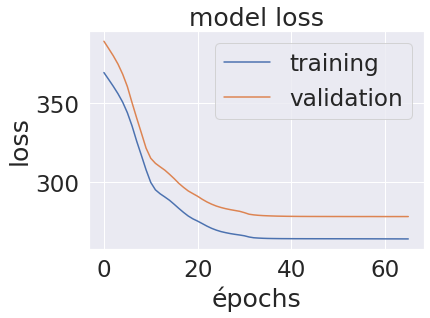

In [81]:
X_train_reshaped1=X_train_reshaped[:10000,:,:]
y_train_reshaped1=y_train_reshaped[:10000]
print(X_train_reshaped1.shape,y_train_reshaped1.shape)
outputdim=1
no_hidden_neurons=32
nb_epoch=100
batch_sizes=1000

#trainX, trainY = create_dataset(X_train,y_train look_back)  
#testX, testY = create_dataset(X_test,y_test,look_back)

# reshape input to be  [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, 3))
#testX = numpy.reshape(testX, (testX.shape[0],look_back, 3))

# create and fit the LSTM network

model = Sequential()
#model.add(LSTM(4, input_dim=look_back))
#model.add(LSTM(no_hidden_neurons,batch_input_shape=(10, X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(no_hidden_neurons,input_shape=(X_train_reshaped1.shape[1], X_train_reshaped1.shape[2])))
model.add(Dense(units=outputdim))
model.compile(loss='mean_squared_error', optimizer='adam')
#batch_input_shape=(32, X.shape[1], X.shape[2])
print(model.summary())

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=4)

history= model.fit(X_train_reshaped1,y_train_reshaped1,validation_split=0.33, epochs=nb_epoch, batch_size=batch_sizes,callbacks=[es])


#inputs=X_train_reshaped
#outputs=y_train_reshaped
#inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
#lstm_out = keras.layers.LSTM(32)(inputs)
#outputs = keras.layers.Dense(1)(lstm_out)

#model = keras.Model(inputs=inputs, outputs=outputs)
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
#model.summary()








# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('épochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()
model.save('lstm_model.h5')

car_data.hist('TEMP',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('TEMP',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

car_data.hist('WIND_MAG',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('WIND_MAG',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()